In [1]:
import os
import h5py
import numba
import numpy as np
import pandas as pd
import scipy.integrate
import matplotlib as mpl
import matplotlib.pyplot as plt
from hoki.utils.exceptions import HokiFormatError
from pylab import cm
from scipy.optimize import fminbound
import matplotlib.ticker as ticker

In [2]:
desktop_path = '/Users/dillon/Desktop/'

In [3]:
BPASS_files = ['100_100', '100_300', '135_100', '135_300', '135all_100', '170_100', '170_300']
models = ['empmodel', 'harikane22', 'MD', 'TNG', 'EAGLE', 'millimillennium']

In [4]:
events = ['Ia_rates', 'CCSN_rates', 'LGRB_rates', 'PISN_rates']

In [5]:
bpass_file_colors = {
    '100_100': 'red',
    '100_300': 'blue',
    '135_100': 'green',
    '135_300': 'orange',
    '135all_100': 'purple',
    '170_100': 'brown',
    '170_300': 'pink',
}

In [6]:
model_data = {}

for model in models:
    model_data[model] = {}  
    for bpass_file in BPASS_files:
        folder_path = os.path.join(desktop_path, bpass_file)
        file_name = f"{model}_{bpass_file}.h5"
        file_path = os.path.join(folder_path, file_name)

        if os.path.exists(file_path):
            with h5py.File(file_path, 'r') as file:
                model_data[model][bpass_file] = {key: file[key][:] for key in file.keys()}

In [7]:
Ia_rates = {}
CCSN_rates = {}
LGRB_rates = {}
PISN_rates = {}

for model in models:
    Ia_rates[model] = {}  # Initialize an empty dictionary for each model
    CCSN_rates[model] = {}  # Initialize CCSN_rates dictionary for each model
    LGRB_rates[model] = {}  # Initialize LGRB_rates dictionary for each model
    PISN_rates[model] = {}  # Initialize PISN_rates dictionary for each model

    for bpass_file in BPASS_files:
        folder_path = os.path.join(desktop_path, bpass_file)
        file_name = f"{model}_{bpass_file}.h5"
        file_path = os.path.join(folder_path, file_name)

        if os.path.exists(file_path):
            # If the file exists, open and read it using h5py
            with h5py.File(file_path, 'r') as file:
                # Load the data into variables before exiting the block
                Ia_rates[model][bpass_file] = file['Ia_rates'][:]
                CCSN_rates[model][bpass_file] = file['CCSN_rates'][:]
                LGRB_rates[model][bpass_file] = file['LGRB_rates'][:]
                PISN_rates[model][bpass_file] = file['PISN_rates'][:]

### Empirical Model

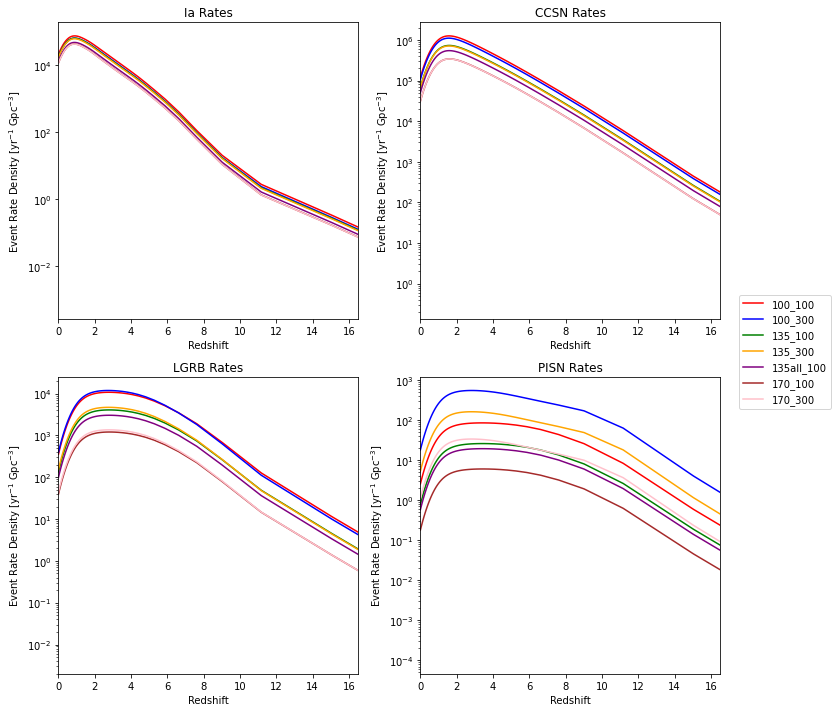

In [8]:
models_to_plot = ['empmodel']

for model in models_to_plot:
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    handles, labels = [], []

    for i, event_type in enumerate(['Ia', 'CCSN', 'LGRB', 'PISN']):
        ax = axs[i // 2, i % 2]

        title_position = 1
        ax.set_title(f'{event_type} Rates', y=title_position)

        for bpass_file in BPASS_files:
            rates_data = globals()[f'{event_type}_rates'][model][bpass_file]
            x_axis_data = model_data[model][bpass_file]['redshift_edges'][:-1]
            
            line, = ax.plot(x_axis_data, rates_data, label=f'{bpass_file}', color=bpass_file_colors[bpass_file])
            
            if i == 0: 
                handles.append(line)
                labels.append(f'{bpass_file}')

        ax.set_xlabel('Redshift')
        ax.set_ylabel(r"Event Rate Density [yr$^{-1}$ Gpc$^{-3}]$")

        ax.set_yscale('log')
        ax.set_xlim(0, 16.5)

    fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.85, 0.5))
    plt.tight_layout(rect=[0, 0, 0.85, 1])  
    
    plt.show()


### Harikane 22

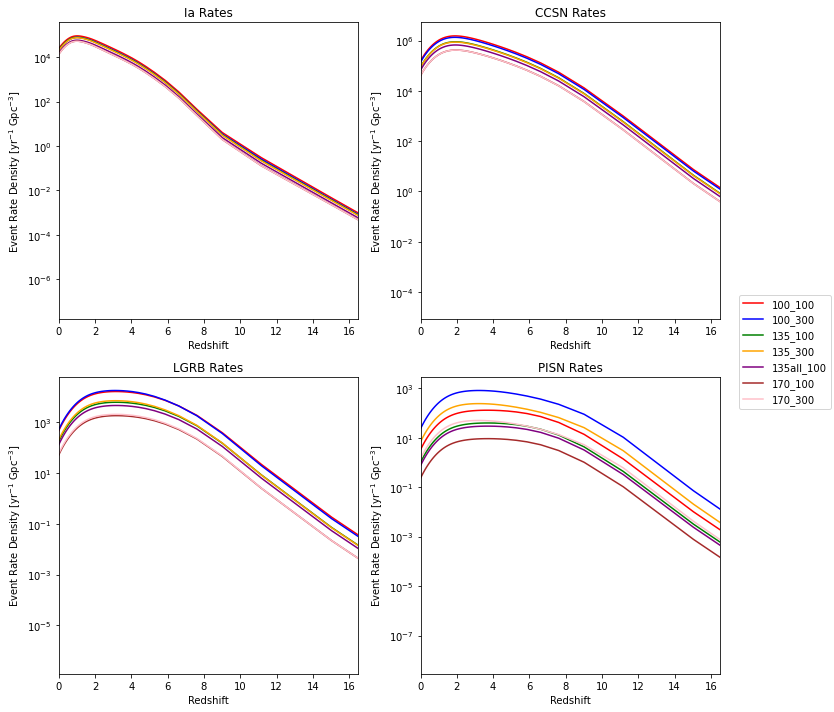

In [9]:
models_to_plot = ['harikane22']

for model in models_to_plot:
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    handles, labels = [], []

    for i, event_type in enumerate(['Ia', 'CCSN', 'LGRB', 'PISN']):
        ax = axs[i // 2, i % 2]

        title_position = 1
        ax.set_title(f'{event_type} Rates', y=title_position)

        for bpass_file in BPASS_files:
            rates_data = globals()[f'{event_type}_rates'][model][bpass_file]
            x_axis_data = model_data[model][bpass_file]['redshift_edges'][:-1]
            
            line, = ax.plot(x_axis_data, rates_data, label=f'{bpass_file}', color=bpass_file_colors[bpass_file])
            
            if i == 0: 
                handles.append(line)
                labels.append(f'{bpass_file}')

        ax.set_xlabel('Redshift')
        ax.set_ylabel(r"Event Rate Density [yr$^{-1}$ Gpc$^{-3}]$")

        ax.set_yscale('log')
        ax.set_xlim(0, 16.5)

    fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.85, 0.5))
    plt.tight_layout(rect=[0, 0, 0.85, 1])  
    
    plt.show()


### TNG

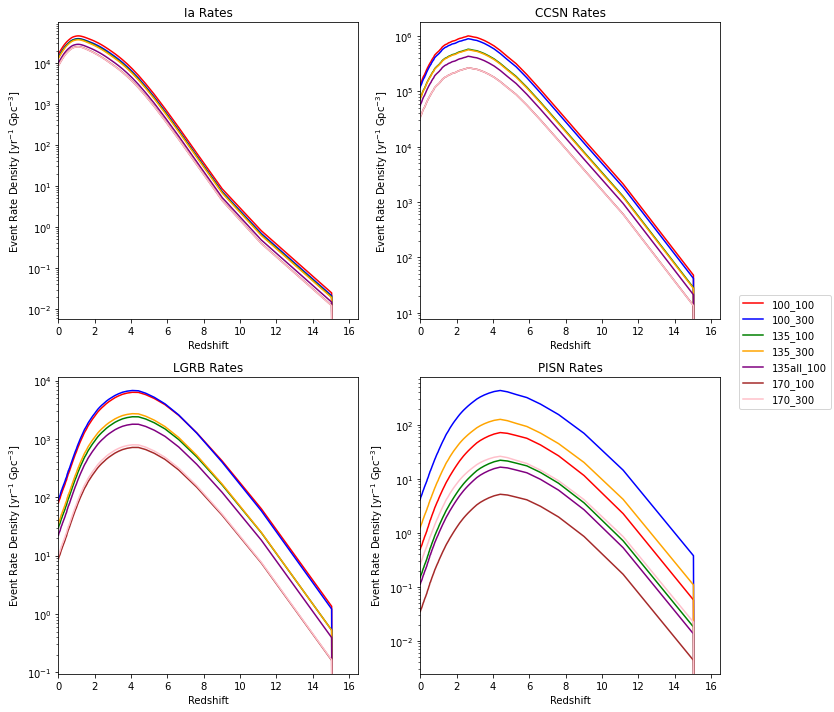

In [10]:
models_to_plot = ['TNG']

for model in models_to_plot:
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    handles, labels = [], []

    for i, event_type in enumerate(['Ia', 'CCSN', 'LGRB', 'PISN']):
        ax = axs[i // 2, i % 2]

        title_position = 1
        ax.set_title(f'{event_type} Rates', y=title_position)

        for bpass_file in BPASS_files:
            rates_data = globals()[f'{event_type}_rates'][model][bpass_file]
            x_axis_data = model_data[model][bpass_file]['redshift_edges'][:-1]
            
            line, = ax.plot(x_axis_data, rates_data, label=f'{bpass_file}', color=bpass_file_colors[bpass_file])
            
            if i == 0: 
                handles.append(line)
                labels.append(f'{bpass_file}')

        ax.set_xlabel('Redshift')
        ax.set_ylabel(r"Event Rate Density [yr$^{-1}$ Gpc$^{-3}]$")

        ax.set_yscale('log')
        ax.set_xlim(0, 16.5)

    fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.85, 0.5))
    plt.tight_layout(rect=[0, 0, 0.85, 1])  
    
    plt.show()


### Madau & Dickinson 

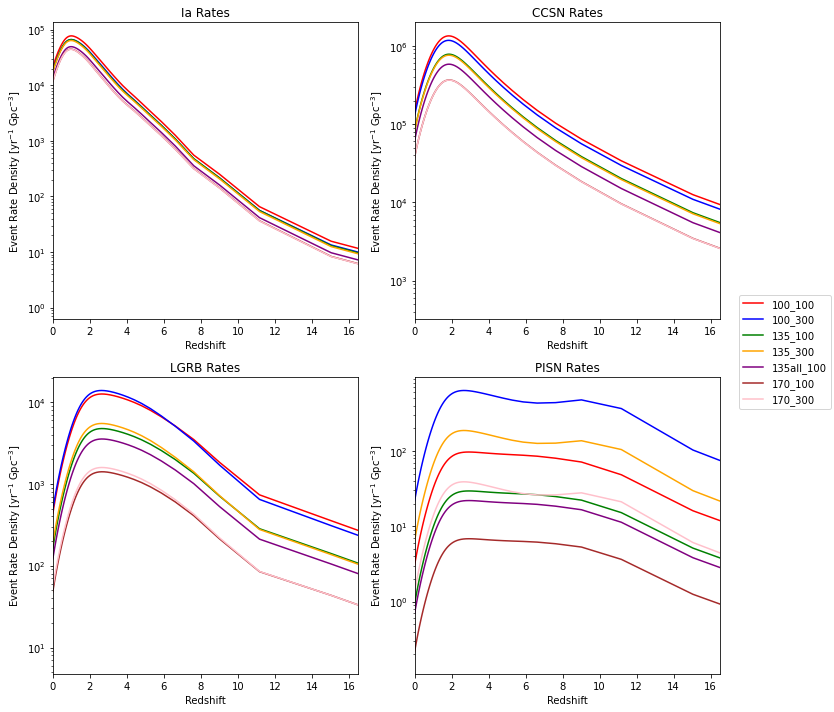

In [11]:
models_to_plot = ['MD']

for model in models_to_plot:
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    handles, labels = [], []

    for i, event_type in enumerate(['Ia', 'CCSN', 'LGRB', 'PISN']):
        ax = axs[i // 2, i % 2]

        title_position = 1
        ax.set_title(f'{event_type} Rates', y=title_position)

        for bpass_file in BPASS_files:
            rates_data = globals()[f'{event_type}_rates'][model][bpass_file]
            x_axis_data = model_data[model][bpass_file]['redshift_edges'][:-1]
            
            line, = ax.plot(x_axis_data, rates_data, label=f'{bpass_file}', color=bpass_file_colors[bpass_file])
            
            if i == 0: 
                handles.append(line)
                labels.append(f'{bpass_file}')

        ax.set_xlabel('Redshift')
        ax.set_ylabel(r"Event Rate Density [yr$^{-1}$ Gpc$^{-3}]$")

        ax.set_yscale('log')
        ax.set_xlim(0, 16.5)

    fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.85, 0.5))
    plt.tight_layout(rect=[0, 0, 0.85, 1])  
    
    plt.show()


### EAGLE

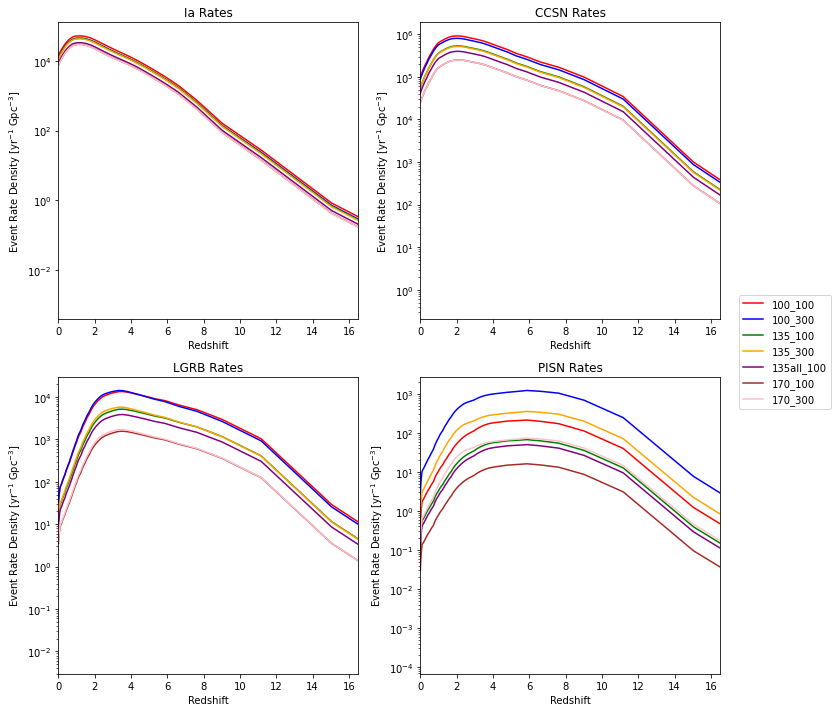

In [12]:
models_to_plot = ['EAGLE']

for model in models_to_plot:
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    handles, labels = [], []

    for i, event_type in enumerate(['Ia', 'CCSN', 'LGRB', 'PISN']):
        ax = axs[i // 2, i % 2]

        title_position = 1
        ax.set_title(f'{event_type} Rates', y=title_position)

        for bpass_file in BPASS_files:
            rates_data = globals()[f'{event_type}_rates'][model][bpass_file]
            x_axis_data = model_data[model][bpass_file]['redshift_edges'][:-1]
            
            line, = ax.plot(x_axis_data, rates_data, label=f'{bpass_file}', color=bpass_file_colors[bpass_file])
            
            if i == 0: 
                handles.append(line)
                labels.append(f'{bpass_file}')

        ax.set_xlabel('Redshift')
        ax.set_ylabel(r"Event Rate Density [yr$^{-1}$ Gpc$^{-3}]$")

        ax.set_yscale('log')
        ax.set_xlim(0, 16.5)

    fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.85, 0.5))
    plt.tight_layout(rect=[0, 0, 0.85, 1])  
    
    plt.show()


### Millimillennium

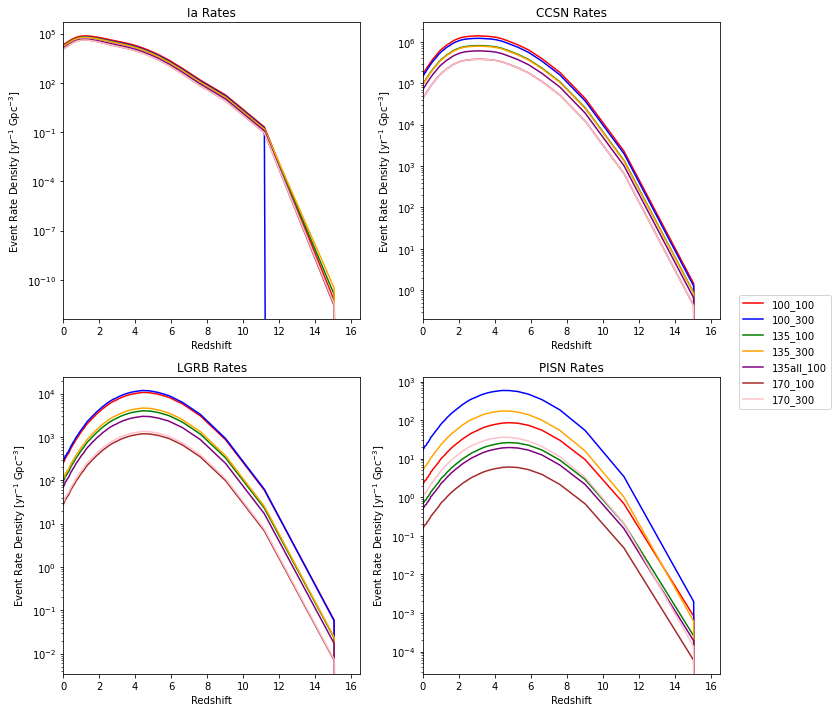

In [13]:
models_to_plot = ['millimillennium']

for model in models_to_plot:
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    handles, labels = [], []

    for i, event_type in enumerate(['Ia', 'CCSN', 'LGRB', 'PISN']):
        ax = axs[i // 2, i % 2]

        title_position = 1
        ax.set_title(f'{event_type} Rates', y=title_position)

        for bpass_file in BPASS_files:
            rates_data = globals()[f'{event_type}_rates'][model][bpass_file]
            x_axis_data = model_data[model][bpass_file]['redshift_edges'][:-1]
            
            line, = ax.plot(x_axis_data, rates_data, label=f'{bpass_file}', color=bpass_file_colors[bpass_file])
            
            if i == 0: 
                handles.append(line)
                labels.append(f'{bpass_file}')

        ax.set_xlabel('Redshift')
        ax.set_ylabel(r"Event Rate Density [yr$^{-1}$ Gpc$^{-3}]$")

        ax.set_yscale('log')
        ax.set_xlim(0, 16.5)

    fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.85, 0.5))
    plt.tight_layout(rect=[0, 0, 0.85, 1])  
    
    plt.show()
